In [2]:
from random import random
from matplotlib import pyplot as plt
import numpy as np

[0 1 1 0]


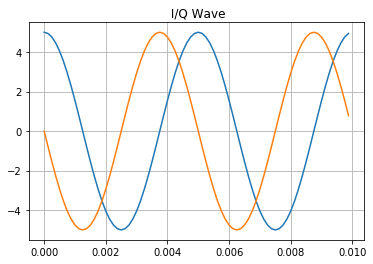

In [13]:
def QAM_Wave(QAM):
    # Constellation
    # 00 -> A * exp( j * pi / 4)  = 1 + j
    # 01 -> A * exp( j * 3pi / 4) = -1 + j
    # 11 -> A * exp(-j * 3pi / 4) = -1 - j
    # 10 -> A * exp(-j * pi / 4) = 1 - j

    I_sign = 0
    Q_sign = 0

    if QAM[0] == 0:
        Q_sign = 1
    else:
        Q_sign = -1

    if QAM[1] == 0:
        I_sign = 1
    else:
        I_sign = -1

    return I_sign, Q_sign

# Config
A = 5
Fs = 8000 # Hz
carrier_frequency = 200
data_size = 4

frequency_step = 1 / Fs
samples = Fs / carrier_frequency * data_size / 2
samples_per_symbol = Fs / carrier_frequency


# Data generation
data = np.arange(data_size)
for n in range(0, data_size):
    if random() > 0.5:
        data[n] = 1
    else:
        data[n] = 0

print(data)


# Split data into I/Q
I_data = np.arange(data_size / 2)
Q_data = np.arange(data_size / 2)


for n in range(0, data_size, 2):
    I_data[int(n / 2)] = data[n]
for n in range(1, data_size, 2):
    Q_data[int(n / 2)] = data[n]
    
    
# Generate I/Q carrier
t = np.arange(start = 0, stop = samples * frequency_step, step = frequency_step)
#print t

I_carrier = A * np.cos(2 * np.pi * carrier_frequency * t)
Q_carrier = (A * np.sin(2 * np.pi * carrier_frequency * t)*-1)

plt.plot(t,I_carrier, t, Q_carrier)
plt.grid(True)
plt.title(' I/Q Wave')
plt.draw()
